In [1]:
import numpy as np
from numpy import load, arange, linspace
import matplotlib.pyplot as plt
from utils import box_plot, num_grad_hug_hop, num_grad_thug_hop
import math
np.set_printoptions(suppress=True)

In [2]:
folder = "dumper6/"#"dumper5/"#"experiment34/"

EPSILONS = load(folder + "EPSILONS.npy")
ALPHAS   = load(folder + "ALPHAS.npy")
TS       = load(folder + "TS.npy")
TIME     = load(folder + "TIME.npy")
D        = int(load(folder + "D.npy"))

ESS_HUG    = load(folder + "ESS_HUG.npy")
ESS_J_HUG  = load(folder + "ESS_JOINT_HUG.npy")
ESS_LOGPI_HUG  = load(folder + "LOGPI_ESS_HUG.npy")
A_HUG      = load(folder + "A_HUG.npy")
EJSD_HUG   = load(folder + "EJSD_HUG.npy")
G_EJSD_HUG = load(folder + "G_EJSD_HUG.npy")
T_EJSD_HUG = load(folder + "T_EJSD_HUG.npy")
N_UNIQUE_HUG = load(folder + "N_UNIQUE_HUG.npy")

ESS_THUG    = load(folder + "ESS_THUG.npy")
ESS_J_THUG  = load(folder + "ESS_JOINT_THUG.npy")
ESS_LOGPI_THUG = load(folder + "LOGPI_ESS_THUG.npy")
A_THUG      = load(folder + "A_THUG.npy")
EJSD_THUG   = load(folder + "EJSD_THUG.npy")
G_EJSD_THUG = load(folder + "G_EJSD_THUG.npy")
T_EJSD_THUG = load(folder + "T_EJSD_THUG.npy")
N_UNIQUE_THUG = load(folder + "N_UNIQUE_THUG.npy")

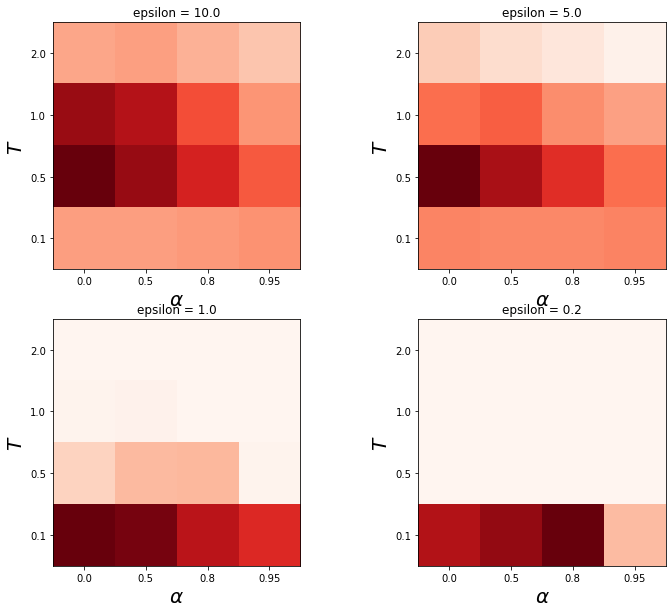

In [31]:
n_rows = math.ceil(len(EPSILONS[:-1]) / 2)
string_alphas = ['0.0'] + np.array([str(a) for a in ALPHAS])[[0, 1, 3]].tolist()
string_ts = [str(T) for T in TS][:-2]
data_list = [
    np.hstack((ESS_J_HUG[:, i, :-2].mean(axis=0).reshape(-1, 1), ESS_J_THUG[:, i, :-2, :].mean(axis=0)[:, [0,1,3]])) for i in range(len(EPSILONS[:-1]))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=n_rows, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS[:-1])):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds', vmin=0.0, vmax=1.0)
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

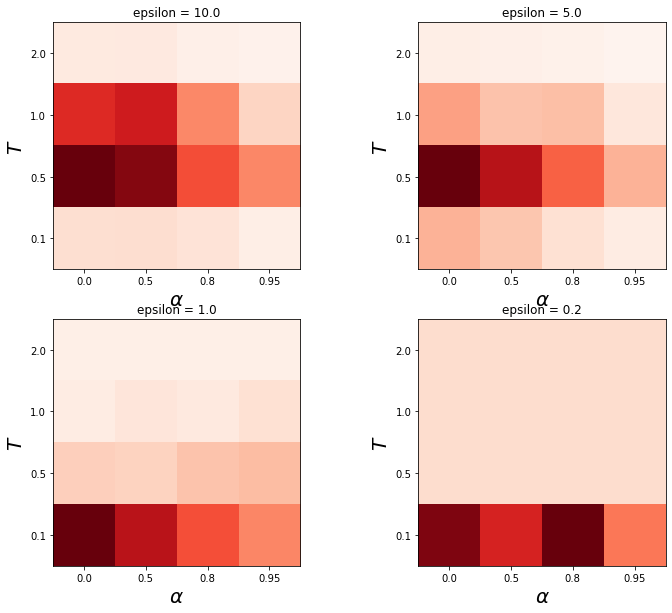

In [26]:
string_alphas = ['0.0'] + np.array([str(a) for a in ALPHAS])[[0, 1, 3]].tolist()
string_ts = [str(T) for T in TS][:-2]
data_list = [
    np.hstack((ESS_LOGPI_HUG[:, i, :-2].mean(axis=0).reshape(-1, 1), ESS_LOGPI_THUG[:, i, :-2, :].mean(axis=0)[:, [0,1,3]])) for i in range(len(EPSILONS[:-1]))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=n_rows, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS[:-1])):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds', vmin=0.0, vmax=1.0)
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

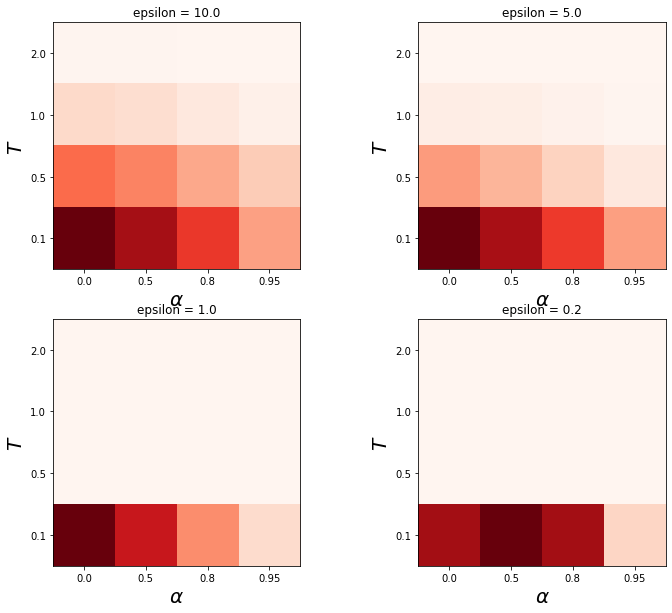

In [9]:
string_alphas = ['0.0'] + np.array([str(a) for a in ALPHAS])[[0, 1, 3]].tolist()
string_ts = [str(T) for T in TS][:-2]
data_list = [
    np.hstack((A_HUG[:, i, :-2].mean(axis=0).reshape(-1, 1), A_THUG[:, i, :-2, :].mean(axis=0)[:,[0,1,3]])) for i in range(len(EPSILONS[:-1]))
]
data_list = [data / np.max(data) for data in data_list]
fig, ax = plt.subplots(nrows=n_rows, ncols=2, figsize=(12,10))
for i in range(len(EPSILONS[:-1])):
    ax[i //2, i % 2].imshow(data_list[i], cmap='Reds', vmin=0.0, vmax=1.0)
    # draw gridlines
    #ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax[i //2, i % 2].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[i //2, i % 2].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
    ax[i //2, i % 2].set_xticklabels(string_alphas)
    ax[i //2, i % 2].set_yticklabels(string_ts)
    ax[i //2, i % 2].set_xlabel('$\\alpha$', fontsize=20)
    ax[i //2, i % 2].set_ylabel('$T$', fontsize=20)
    ax[i //2, i % 2].set_title("epsilon = {}".format(EPSILONS[i]))
    ax[i //2, i % 2].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[i //2, i % 2].set_ylim(len(string_ts)-0.5, -0.5)
plt.show()

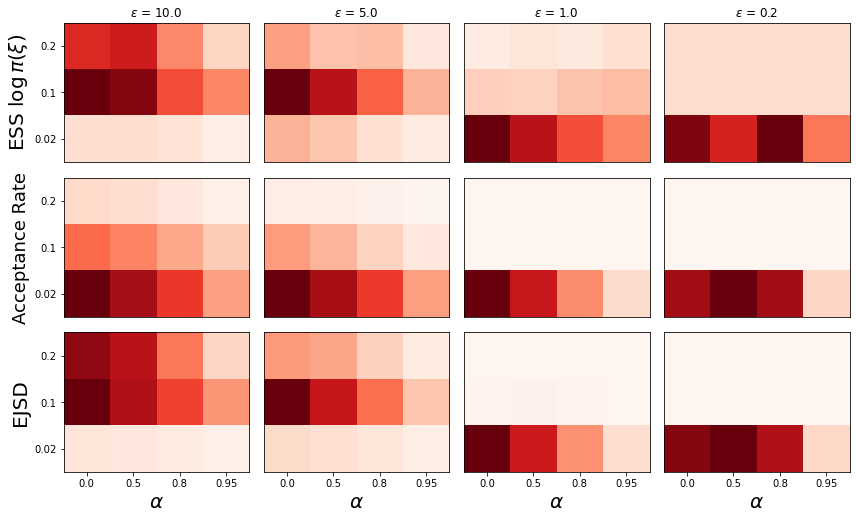

In [35]:
string_alphas = ['0.0'] + np.array([str(a) for a in ALPHAS])[[0, 1, 3]].tolist()
string_ts = np.array([str(T/5) for T in TS])[1:-2]
#### LOGPI ESS
data_list_logpi = [
    np.hstack((ESS_LOGPI_HUG[:, i, :].mean(axis=0).reshape(-1, 1)[1:-2], ESS_LOGPI_THUG[:, i, :, :].mean(axis=0)[1:-2, [0, 1, 3]])) for i in range(len(EPSILONS[[0, 2, 3, 4]]))
]
data_list_logpi = [data / np.max(data) for data in data_list_logpi]
#### AP
data_list_ap = [
    np.hstack((A_HUG[:, i, :].mean(axis=0).reshape(-1, 1)[1:-2], A_THUG[:, i, :, :].mean(axis=0)[1:-2, [0, 1, 3]])) for i in range(len(EPSILONS[[0, 2, 3, 4]]))
]
data_list_ap = [data / np.max(data) for data in data_list_ap]
#### EJSD
data_list_ejsd = [
    np.hstack((EJSD_HUG[:, i, :].mean(axis=0).reshape(-1, 1)[1:-2], EJSD_THUG[:, i, :, :].mean(axis=0)[1:-2, [0, 1, 3]])) for i in range(len(EPSILONS[[0, 2, 3, 4]]))
]
data_list_ejsd = [data / np.max(data) for data in data_list_ejsd]

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12,14))
for i in range(len(EPSILONS[[0, 2, 3, 4]])):
    
    #### ESS LOGPI
    ax[0, i].imshow(data_list_logpi[i], cmap='Reds', vmin=0.0, vmax=1.0)
    ax[0, i].set_xticks([])
    ax[0, i].set_xticklabels([])
    if i == 0:
        ax[0, i].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
        ax[0, i].set_yticklabels(string_ts)
        ax[0, i].set_ylabel('ESS $\log\pi(\\xi)$', fontsize=20)
    else:
        ax[0, i].set_yticks([])
        ax[0, i].set_yticklabels([])
    ax[0, i].set_title("$\epsilon$ = {}".format(EPSILONS[i]))
    ax[0, i].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[0, i].set_ylim(len(string_ts)-0.5, -0.5)
    
    #### ACCEPTANCE PROBABILITY
    ax[1, i].imshow(data_list_ap[i], cmap='Reds', vmin=0.0, vmax=1.0)
    ax[1, i].set_xticks([]);
    ax[1, i].set_xticklabels([])
    if i == 0:
        ax[1, i].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
        ax[1, i].set_yticklabels(string_ts)
        ax[1, i].set_ylabel('Acceptance Rate', fontsize=18)
    else:
        ax[1, i].set_yticks([])
        ax[1, i].set_yticklabels([])
    ax[1, i].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[1, i].set_ylim(len(string_ts)-0.5, -0.5)
    
    #### EJSD
    ax[2, i].imshow(data_list_ejsd[i], cmap='Reds', vmin=0.0, vmax=1.0)
    ax[2, i].set_xticks(np.arange(0.0, len(string_alphas)-0.5, 1));
    ax[2, i].set_xticklabels(string_alphas)
    if i == 0:
        ax[2, i].set_yticks(np.arange(0.0, len(string_ts)-0.5, 1));
        ax[2, i].set_yticklabels(string_ts)
        ax[2, i].set_ylabel('EJSD', fontsize=20)
    else:
        ax[2, i].set_yticks([])
        ax[2, i].set_yticklabels([])
    ax[2, i].set_xlabel('$\\alpha$', fontsize=20)
    ax[2, i].set_xlim(-0.5, len(string_alphas)-0.5)
    ax[2, i].set_ylim(len(string_ts)-0.5, -0.5)
fig.tight_layout()
plt.subplots_adjust(hspace=0.01, top=0.47)
plt.savefig("experiment34_figures/gk_experiments.png", dpi=500)
plt.show()